In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string
import re 
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
df = pd.read_csv('movie_gener_classification.csv')

In [5]:
df.head()

,Unnamed: 0,Title,Gener,Description
0,0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
df.isnull().sum()

Unnamed: 0     0
Title          0
Gener          0
Description    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108414 entries, 0 to 108413
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   108414 non-null  int64 
 1   Title        108414 non-null  object
 2   Gener        108414 non-null  object
 3   Description  108414 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Gener'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [10]:
df['Gener'].value_counts()

Gener
drama           27225
documentary     26192
comedy          14893
short           10145
horror           4408
thriller         3181
action           2629
western          2064
reality-tv       1767
family           1567
adventure        1550
music            1462
romance          1344
sci-fi           1293
adult            1180
crime            1010
animation         996
sport             863
talk-show         782
fantasy           645
mystery           637
musical           553
biography         529
history           486
game-show         387
news              362
war               264
Name: count, dtype: int64

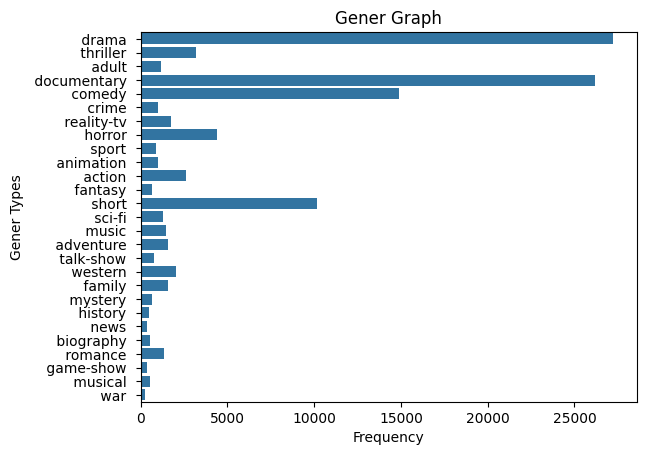

In [11]:
plt.title('Gener Graph')
sns.countplot(df['Gener'])
plt.xlabel('Frequency')
plt.ylabel('Gener Types')
plt.show()

In [13]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [self._clean_text(text) for text in X]
    
    def _clean_text(self, text):
        text = text.lower()
        text = re.sub(r'@\S+','',text)                       # [1] remove mentions
        text = re.sub(r'http\S+', '', text)                  # [2] remove urls
        text = re.sub(r'[\w\.-]+@[\w\.-]+',"",text)          # [3] remove emails
        text = re.sub(r"[^a-zA-Z+']", ' ', text)             # [4] keep only english chars / remove numbers
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # [5] remove single chars
        text = re.sub(r'pic.\S+', '',text)                   # [6] remove pics
        text = re.sub(r'#', "", text)                        # [7] remove hashtags
        text = re.sub(r"_", "  ", text)                      # [8] remove underscores
        text = re.sub('\n'," . ",text)                       # [9] remove new lines
        text = re.sub('\[[^]]*\]','',text)                   # [10] remove square brackets
        text = "".join([char for char in text if char not in string.punctuation]) # [11] remove punctuations
        text = re.sub("\s[\s]+", " ",text).strip()           # [12] remove repeated/leading/trailing spaces
        tokens = word_tokenize(text)                         # [13] Tokenize
        text = " ".join([word for word in tokens if word not in self.stop_words and len(word) > 2]) # [14] remove stop words

        return text

In [14]:
from sklearn import set_config
set_config(display='diagram')

In [15]:
trf3 = LogisticRegression()
text_cleaner = TextCleaner()
tfivec = TfidfVectorizer(stop_words='english', max_features=100000)

In [16]:
pipe = Pipeline([
    ('text_cleaner',text_cleaner),
    ('vectorizer',tfivec),
    ('classifier',trf3 )
])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['Description'],df['Gener'],test_size=0.3, random_state=100)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75889,), (32525,), (75889,), (32525,))

## Training model without encoding the Y variablevariable 

In [20]:
pipe.fit(X_train,y_train)

C:\Users\ankur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('text_cleaner', TextCleaner()),
                ('vectorizer',
                 TfidfVectorizer(max_features=100000, stop_words='english')),
                ('classifier', LogisticRegression())])

In [21]:
pred = pipe.predict(X_test)

In [22]:
pred

array([' comedy ', ' documentary ', ' drama ', ..., ' comedy ', ' drama ',
       ' drama '], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accu = accuracy_score(y_test, pred)

In [25]:
accu*100

60.25518831667947

### Dumping the model

In [35]:
import pickle

In [36]:
pickle.dump(pipe,open('LR_model.pkl','wb'))

## Training Model With Encoded Y variable

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
le.fit(y_train)

LabelEncoder()

In [29]:
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [30]:
pipe.fit(X_train,y_train_enc)

C:\Users\ankur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('text_cleaner', TextCleaner()),
                ('vectorizer',
                 TfidfVectorizer(max_features=100000, stop_words='english')),
                ('classifier', LogisticRegression())])

In [31]:
pred = pipe.predict(X_test)

In [32]:
pred

array([5, 7, 8, ..., 5, 8, 8])

In [33]:
accu = accuracy_score(y_test_enc,pred)

In [34]:
accu*100

60.25518831667947